# 用矩阵运算仿真BP神经网络

In [1]:
import tensorflow as tf
import numpy as np

C:\Users\admin\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


##### y= relu ( (X․W ) + b )

In [2]:
X = tf.Variable([[0.4,0.2,0.4]])

W = tf.Variable([[-0.5,-0.2 ],
                 [-0.3, 0.4 ],
                 [-0.5, 0.2 ]])
                         
b = tf.Variable([[0.1,0.2]])
    
XWb =tf.matmul(X,W)+b

y=tf.nn.relu(tf.matmul(X,W)+b)#引用ReLU激活函数

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print('XWb:')    
    print(sess.run(XWb ))    
    print('y:')    
    print(sess.run(y ))

XWb:
[[-0.35999998  0.28      ]]
y:
[[0.   0.28]]


##### y= sigmoid ( (X․W ) + b )

In [3]:
X = tf.Variable([[0.4,0.2,0.4]])

W = tf.Variable([[-0.5,-0.2 ],
                 [-0.3, 0.4 ],
                 [-0.5, 0.2 ]])

b = tf.Variable([[0.1,0.2]])

XWb=tf.matmul(X,W)+b

y=tf.nn.sigmoid(tf.matmul(X,W)+b)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print('XWb:')    
    print(sess.run(XWb))    
    print('y:')    
    print(sess.run(y ))

XWb:
[[-0.35999998  0.28      ]]
y:
[[0.41095957 0.5695462 ]]


# 以随机数产生Weight(W)与bais(b) 

In [4]:
W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([1, 2]))
X = tf.Variable([[0.4,0.2,0.4]])
y=tf.nn.relu(tf.matmul(X,W)+b)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print('b:')
    print(sess.run(b ))    
    print('W:')
    print(sess.run(W ))
    print('y:')
    print(sess.run(y ))    

b:
[[-0.1278446   0.15272076]]
W:
[[ 0.09724175 -0.70408934]
 [ 1.4106061  -0.39071304]
 [-0.74939483 -0.36333686]]
y:
[[0. 0.]]


In [5]:
W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([1, 2]))
X = tf.Variable([[0.4,0.2,0.4]])
y=tf.nn.relu(tf.matmul(X,W)+b)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    (_b,_W,_y)=sess.run((b,W,y))#等价于三次se
    print('b:')
    print(_b)
    print('W:')
    print(_W)
    print('y:')
    print(_y)   

b:
[[-0.5877543  2.1299696]]
W:
[[ 1.0390263   0.5285081 ]
 [-0.92886233 -0.5300881 ]
 [ 0.4078475   0.684533  ]]
y:
[[0.        2.5091684]]


##### placeholder

In [6]:
W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([1, 2]))
X = tf.placeholder("float", [None,3])
y=tf.nn.relu(tf.matmul(X,W)+b)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.array([[0.4,0.2,0.4]])
    (_b,_W,_X,_y)=sess.run((b,W,X,y),feed_dict={X:X_array})
    print('b:')
    print(_b)    
    print('W:')
    print(_W)
    print('X:')
    print(_X)
    print('y:')
    print(_y)

b:
[[-1.00988698 -0.90781182]]
W:
[[ 0.77819425  0.74534345]
 [ 0.62385881 -0.30757746]
 [ 0.84864932  1.10149086]]
X:
[[ 0.40000001  0.2         0.40000001]]
y:
[[ 0.  0.]]


In [7]:
_y.shape

(1, 2)

In [8]:
ts_norm = tf.random_normal([1000])
with tf.Session() as session:
    norm_data=ts_norm.eval()
print(len(norm_data))
print(norm_data[:30])

1000
[-0.62594283 -1.53080451  0.20968008  0.48862299 -0.98033726  1.56872106
  0.34392843 -0.32248533 -1.38410163 -0.8074798   0.06213726  0.41173849
 -0.79638833  0.07239912 -1.5461148  -1.4486984   0.5450505   0.37378398
 -0.23069905 -0.26489291 -1.30195487 -0.18677172  0.50207907 -1.00787842
  0.56418502  0.51869804 -1.74017227 -2.36948991  0.98451078  0.93969965]


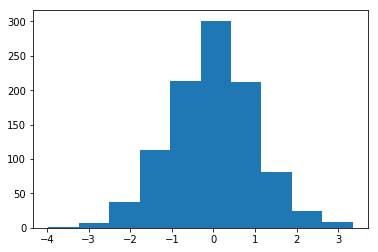

In [10]:
import matplotlib.pyplot as plt
plt.hist(norm_data)
plt.show()    

In [11]:
W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([1, 2]))
X = tf.placeholder("float", [None,3])
y=tf.nn.sigmoid(tf.matmul(X,W)+b)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.array([[0.4,0.2 ,0.4],
                        [0.3,0.4 ,0.5],
                        [0.3,-0.4,0.5]])    
    (_b,_W,_X,_y)=sess.run((b,W,X,y),feed_dict={X:X_array})
    print('b:')
    print(_b)    
    print('W:')
    print(_W)
    print('X:')
    print(_X)
    print('y:')
    print(_y)

b:
[[ 1.3742691 -0.6307982]]
W:
[[-0.25237647  0.28716296]
 [-0.24805067 -0.40259644]
 [ 1.6787063  -1.9441847 ]]
X:
[[ 0.4  0.2  0.4]
 [ 0.3  0.4  0.5]
 [ 0.3 -0.4  0.5]]
y:
[[0.86934626 0.20195402]
 [0.88479966 0.15738963]
 [0.90353453 0.20493953]]


# 建立layer函数
> 功能是建立两层神经网络

In [12]:
def layer(output_dim,input_dim,inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

In [13]:
X = tf.placeholder("float", [None,4])

y=layer(output_dim=3,input_dim=4,inputs=X,
        activation=tf.nn.relu)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.array([[0.4,0.2 ,0.4,0.1],
                        [0.3,0.4 ,0.5,0.3],
                        [0.3,-0.4,0.5,0.2]])    
    (_X,_y)=sess.run((X,y),feed_dict={X:X_array})
    print('X:')
    print(_X)
    print('y:')
    print(_y)    

X:
[[ 0.4  0.2  0.4  0.1]
 [ 0.3  0.4  0.5  0.3]
 [ 0.3 -0.4  0.5  0.2]]
y:
[[0.         0.79015875 1.5285197 ]
 [0.31821787 1.2630901  1.1021228 ]
 [0.48398763 0.33778787 1.7573613 ]]


In [14]:
X = tf.placeholder("float", [None,4])
h=layer(output_dim=3,input_dim=4,inputs=X,
        activation=tf.nn.relu)
y=layer(output_dim=2,input_dim=3,inputs=h)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.array([[0.4,0.2 ,0.4,0.5]])    
    (layer_X,layer_h,layer_y)= \
            sess.run((X,h,y),feed_dict={X:X_array})
    print('input Layer X:')
    print(layer_X)
    print('hidden Layer h:')
    print(layer_h)
    print('output Layer y:')
    print(layer_y)

input Layer X:
[[0.4 0.2 0.4 0.5]]
hidden Layer h:
[[1.5489424  0.         0.63559824]]
output Layer y:
[[3.4448848  0.05538869]]


# 改进layer函数，使其能返回w和b

In [15]:
def layer_2(output_dim,input_dim,inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs,W,b

In [16]:
X = tf.placeholder("float", [None,4])
h,W1,b1=layer_debug(output_dim=3,input_dim=4,inputs=X,
                    activation=tf.nn.relu)
y,W2,b2=layer_debug(output_dim=2,input_dim=3,inputs=h)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.array([[0.4,0.2 ,0.4,0.5]])    
    (layer_X,layer_h,layer_y,W1,b1,W2,b2)= \
             sess.run((X,h,y,W1,b1,W2,b2),feed_dict={X:X_array})
    print('input Layer X:')
    print(layer_X)
    print('W1:')
    print(  W1)    
    print('b1:')
    print(  b1)    
    print('hidden Layer h:')
    print(layer_h)    
    print('W2:')
    print(  W2)    
    print('b2:')
    print(  b2)    
    print('output Layer y:')
    print(layer_y)

input Layer X:
[[0.4 0.2 0.4 0.5]]
W1:
[[-2.494698    0.10329538 -0.5353932 ]
 [-1.022263   -1.1610479  -3.0859344 ]
 [ 1.9652166   0.3464464   1.2346822 ]
 [-1.0058508  -0.81840676 -0.9512821 ]]
b1:
[[ 0.1718771   0.93178105 -1.4650283 ]]
hidden Layer h:
[[0.        0.4702648 0.       ]]
W2:
[[ 0.80631006  1.5261457 ]
 [ 0.24046504 -0.08329547]
 [ 0.2570049   0.40859744]]
b2:
[[-0.16517083  0.45186767]]
output Layer y:
[[-0.05208859  0.41269675]]
